In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import scikitplot as skplt


# Scikit-learn
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier # RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score # mean_squared error, roc_auc_score, accuracy_score, f1 score
from sklearn.linear_model import LogisticRegression
#

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframes = []
total_wanted_files = 250 #1000 files to be used
files_used = []
teams = []

for file_name in tqdm(os.listdir('Cleaned_data'), desc='Read Files'):
  if total_wanted_files == 0:
    break

  _data = pd.read_csv(f'./Cleaned_data/{file_name}')
  _data['Win'] = 0
  files_used.append(file_name)
  total_wanted_files -= 1

  _data.replace(np.nan, 0, inplace=True)

  home_df = _data[_data['Home Team'] == 1]
  away_df = _data[_data['Home Team'] == 0]
  teams.append(away_df)
  teams.append(home_df)


  home_stats = []
  away_stats = []

  terms = ['Q1', 'Q2', 'H1', 'Q3', 'Q4', 'H2']
  columns = [4, 5, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

  home_q1 = [0] * 16
  home_q2 = [0] * 16
  home_h1 = [0] * 16
  home_q3 = [0] * 16
  home_q4 = [0] * 16
  home_h2 = [0] * 16

  home_stats.append(home_q1)
  home_stats.append(home_q2)
  home_stats.append(home_h1)
  home_stats.append(home_q3)
  home_stats.append(home_q4)
  home_stats.append(home_h2)

  away_q1 = [0] * 16
  away_q2 = [0] * 16
  away_h1 = [0] * 16
  away_q3 = [0] * 16
  away_q4 = [0] * 16
  away_h2 = [0] * 16

  away_stats.append(away_q1)
  away_stats.append(away_q2)
  away_stats.append(away_h1)
  away_stats.append(away_q3)
  away_stats.append(away_q4)
  away_stats.append(away_h2)


  for term in range(6): #add team stats together and add term last
    for col in range(len(columns)):
      for row in range(len(home_df)):
        if home_df.iloc[row, 1] == terms[term]:
          home_stats[term][col] += float(home_df.iloc[row, columns[col]])
    home_stats[term].append(terms[term])

  for term in range(6):
    for col in range(len(columns)):
      for row in range(len(away_df)):
        if away_df.iloc[row, 1] == terms[term]:
          away_stats[term][col] += float(away_df.iloc[row, columns[col]])
    away_stats[term].append(terms[term])

  


  for arr in home_stats: #add column identifying home team
    arr.append(1)
  for arr in away_stats:
    arr.append(0)


  total_points = 0
  for arr in home_stats:
    total_points += arr[-4]

  for arr in away_stats:
    total_points -= arr[-4]

  


  for i in range(6): #add column identifying winner
    if total_points > 0:
      home_stats[i].append(1)
      away_stats[i].append(0)
    else:
      home_stats[i].append(0)
      away_stats[i].append(1)

  home = pd.DataFrame(home_stats, 
  columns=['FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
          'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
          'TOV', 'PF', 'PTS', '+/-', 'Term', 'Home Team', 'Win'])

  away = pd.DataFrame(away_stats, 
  columns=['FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
          'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
          'TOV', 'PF', 'PTS', '+/-', 'Term', 'Home Team', 'Win'])


  dataframes.append(home)
  dataframes.append(away)


dataframe = pd.concat(dataframes)
#dataframe = dataframe.stack(level=-1).reset_index(drop=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
  print(dataframe)
#display(dataframe) #a 3-d dataframe

Read Files:   1%|          | 250/32881 [01:15<2:44:26,  3.31it/s]


     FG   FGA   3P   3PA    FT   FTA   ORB   DRB   TRB   AST   STL   BLK   
0  12.0  20.0  3.0   5.0   1.0   4.0   2.0   6.0   8.0   7.0   4.0   1.0  \
1  13.0  21.0  3.0   6.0   2.0   4.0   2.0   7.0   9.0   9.0   3.0   1.0   
2  25.0  41.0  6.0  11.0   3.0   8.0   4.0  13.0  17.0  16.0   7.0   2.0   
3   5.0  19.0  1.0   4.0   7.0   8.0   4.0   3.0   7.0   1.0   1.0   0.0   
4   8.0  24.0  1.0   5.0   4.0   7.0   6.0   6.0  12.0   3.0   2.0   0.0   
5  13.0  43.0  2.0   9.0  11.0  15.0  10.0   9.0  19.0   4.0   3.0   0.0   
0  11.0  19.0  1.0   5.0   4.0   7.0   1.0   5.0   6.0   7.0   1.0   3.0   
1   7.0  16.0  0.0   3.0   7.0  10.0   2.0   5.0   7.0   3.0   4.0   1.0   
2  18.0  35.0  1.0   8.0  11.0  17.0   3.0  10.0  13.0  10.0   5.0   4.0   
3  14.0  21.0  0.0   1.0   4.0   5.0   2.0   9.0  11.0  12.0   1.0   3.0   
4  10.0  18.0  0.0   4.0   7.0  10.0   3.0  10.0  13.0   6.0   1.0   1.0   
5  24.0  39.0  0.0   5.0  11.0  15.0   5.0  19.0  24.0  18.0   2.0   4.0   
0  11.0  26.

Functions that converts information

In [3]:
def convert_pos(s):
  if len(s) == 1:
    if s == 'G':
      return 1
    elif s == 'F':
      return 3
    elif s == 'C':
      return 5
    
  elif len(s) == 2:
    if s == 'PG':
      return 1
    elif s == 'SG' or s == 'GF':
      return 2
    elif s == 'SF':
      return 3
    elif s == 'PF' or s == 'FC':
      return 4
    
  elif len(s) == 3:
    if s == 'G-F' or s == 'F-G':
      return 2
    elif s == 'F-C' or s == 'C-F':
      return 4


def convert_term(term):
  if term == 'Q1':
    return 1
  elif term == 'Q2':
    return 2
  elif term == 'H1':
    return 3
  elif term == 'Q3':
    return 4
  elif term == 'Q4':
    return 5
  elif term == 'H2':
    return 6

In [4]:
temp = dataframe.copy(deep=True)
temp.drop('PTS', axis=1, inplace=True)
#temp.drop('+/-', axis=1, inplace=True)
temp.drop('TRB', axis=1, inplace=True)

temp.dropna(inplace=True)
print(temp.columns)

temp['Term'] = temp['Term'].apply(convert_term)
'''

rand_data = temp.copy(deep=True)
num_rand_features = 10
all_features = len(rand_data.columns) - 1
rand_indices = random.sample(range(all_features), num_rand_features)


rand_features = rand_data.iloc[:, rand_indices]
print(rand_features)
rand_arr = rand_features.to_numpy()

'''
gbc_temp = temp.drop(['FG', '3P', 'STL', 'BLK', 'Term', 'Home Team'], axis=1)
rfc_temp = temp.drop(['3P', 'ORB', 'STL', 'BLK', 'Term', 'Home Team'], axis=1)

gbc_arr = gbc_temp.to_numpy()
rfc_arr = rfc_temp.to_numpy()


gbc_x = gbc_arr[:, :-1]
rfc_x = gbc_arr[:, :-1]

arr = temp.to_numpy()
x = arr[:, :-1]
y = arr[:, -1].astype('int')

Index(['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', '+/-', 'Term', 'Home Team', 'Win'],
      dtype='object')


Gradient Boosting Classifier Models

roc_auc

Times Looped: 0it [00:00, ?it/s]


NestedCV: 1 of outer fold 10
FGA: 0.1018138217058988
3PA: 0.09253704097968096
FT: 0.0815605734611477
FTA: 0.08403578016017221
ORB: 0.07480110297240708
DRB: 0.08985872662671332
AST: 0.08461566091863199
TOV: 0.074456458303015
PF: 0.0874029602353575
+/-: 0.22891787463697547


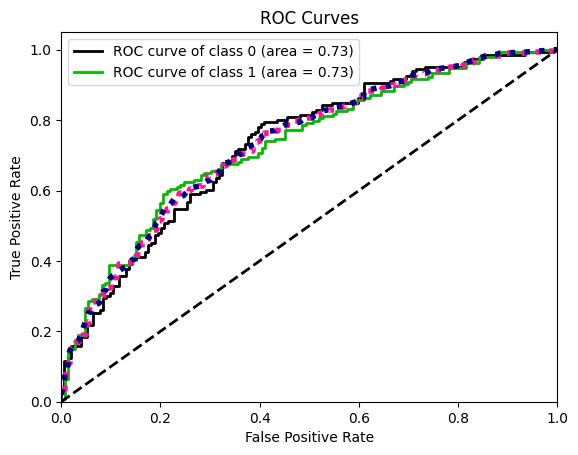

Times Looped: 1it [11:41, 701.99s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1600}
    Best MSE              : 0.71

    Training
        MSE: 1.000
    Test
        MSE: 0.670
    

NestedCV: 2 of outer fold 10
FGA: 0.10266212297449717
3PA: 0.08769702251286178
FT: 0.07461268909029689
FTA: 0.09202044652319796
ORB: 0.07542461807958482
DRB: 0.09298720805349124
AST: 0.09226877648949416
TOV: 0.07875643529899179
PF: 0.09389549442730222
+/-: 0.20967518655028203


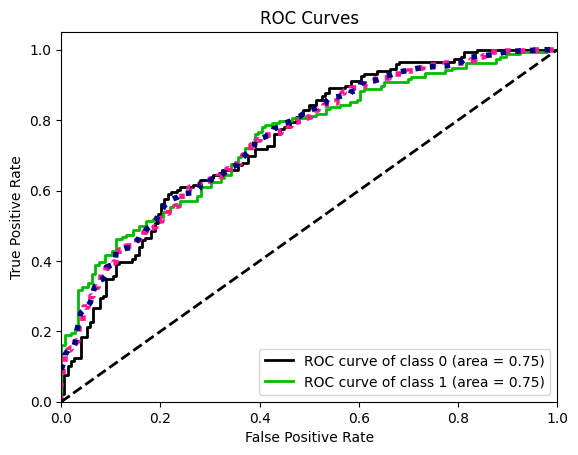

Times Looped: 2it [23:32, 707.14s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2000}
    Best MSE              : 0.72

    Training
        MSE: 1.000
    Test
        MSE: 0.660
    

NestedCV: 3 of outer fold 10


Times Looped: 2it [25:16, 758.13s/it]


KeyboardInterrupt: 

In [5]:
cv_inner = KFold(n_splits=2, shuffle=True, random_state=42)          #1
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
# 10x2 nested cross validation
# 9 folds for training, 1 fold for testing
# 9 folds --> 50% (training) - 50% (validation) split 
classifier = GradientBoostingClassifier()       # RandomForestClassifier, GradientBoostingClassifier, LogisticRegression        #2

p_grid = {#'bootstrap': [True, False],
        'max_depth': [40, 60, 80],
        'max_features': [None, 'sqrt'],
        'min_samples_leaf': [2, 4, 6, 8],
        'min_samples_split': [2, 4, 6, 8],
        'n_estimators': [1600, 2000]}


history = []
feature_values = [[] for i in range(len(gbc_arr[0])-1)] #will hold feature_importance values from each fold
score_history = [] #will hold scores from each fold
pointer = 1

for train_index, test_index in tqdm(cv_outer.split(gbc_x, y), desc='Times Looped'):                          #3
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv_outer.get_n_splits()))
    x_train, x_test = gbc_x[train_index], gbc_x[test_index] # x (features)
    y_train, y_test = y[train_index], y[test_index] # y (target)

    model = GridSearchCV(classifier, param_grid=p_grid,
                        scoring='roc_auc', cv=cv_inner, n_jobs=-1) # classification --> roc_auc, f1, accuracy   # Grid search  #4x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    

    temp0 = model.fit(x_train, y_train) # trains ML model


    feature_importance = model.best_estimator_.feature_importances_ #prints feature with value of importance
    for i in range(10):
        feature_values[i].append(feature_importance[i])
        print(f'{gbc_temp.columns[i]}: {feature_importance[i]}')

    
    probas = temp0.predict_proba(x_test)
    # Now plot.
    skplt.metrics.plot_roc(y_test, probas)
    handles, labels = plt.gca().get_legend_handles_labels()
    handles = handles[:2]
    labels = labels[:]
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.show()

    
    pred_test = model.predict(x_test) # predict test data
    pred_training = model.predict(x_train) # predict training data

    
    # Evaluate model performance
    # scikit learn accuracy
    auc_train = roc_auc_score(y_train, pred_training)     #roc_auc_score, f1, accuracy       #5
    auc_test = roc_auc_score(y_test, pred_test)       #roc_auc_score
    score_history.append(auc_test)


    
    print("""
    Best set of parameters: {}
    Best MSE              : {:.2f}

    Training
        MSE: {:.3f}
    Test
        MSE: {:.3f}
    """.format(
        model.best_params_,
        model.best_score_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1

print('Overall test performance: {:.2f}'.format(np.mean(history)))



print('Averages of feature importance are: ') #calculates standard deviation for each feature
for i, feature in enumerate(feature_values):
    print(f'{gbc_temp.columns[i]}: {feature}, std: {np.std(np.array(feature_values[i]), dtype=np.float32)}')


from statistics import mean #calculates the mean
means = []
for i, feature in enumerate(feature_values):
    means.append(mean(feature))
[print(gbc_x) for gbc_x in means]


print(f'std of scores: {np.std(score_history)}')

f1

Times Looped: 0it [00:00, ?it/s]


NestedCV: 1 of outer fold 10
FGA: 0.10756665222788243
3PA: 0.09236789724413003
FT: 0.0750031020360855
FTA: 0.08683415365279108
ORB: 0.0729792957986498
DRB: 0.08605200181810108
AST: 0.09108757175133692
TOV: 0.07546027466759993
PF: 0.08951046279075954
+/-: 0.22313858801266373


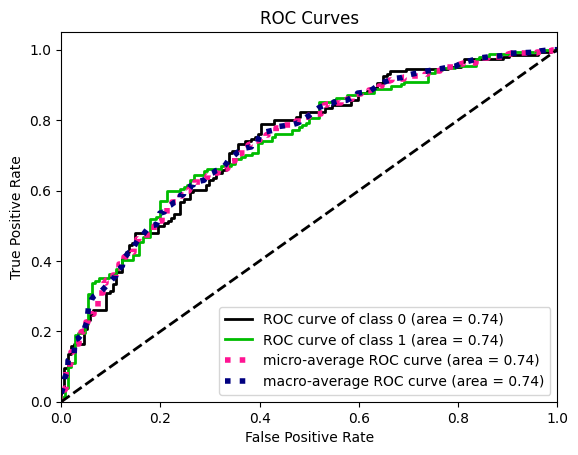

Times Looped: 1it [07:50, 470.34s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2000}
    Best MSE              : 0.66

    Training
        MSE: 1.000
    Test
        MSE: 0.671
    

NestedCV: 2 of outer fold 10
FGA: 0.10348967278491032
3PA: 0.0840945481556737
FT: 0.07904358489059544
FTA: 0.08682186929595295
ORB: 0.06840109705832277
DRB: 0.09494588887777575
AST: 0.0901949171486815
TOV: 0.07526536729494465
PF: 0.09588988603658999
+/-: 0.22185316845655292


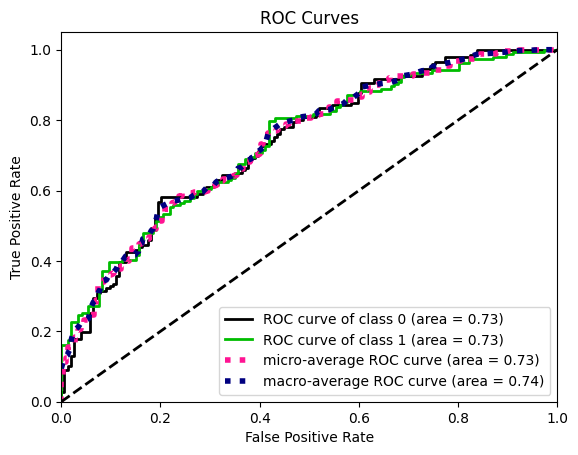

Times Looped: 2it [15:50, 476.05s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2000}
    Best MSE              : 0.67

    Training
        MSE: 1.000
    Test
        MSE: 0.649
    

NestedCV: 3 of outer fold 10
FGA: 0.105391162494695
3PA: 0.0916224490230389
FT: 0.0742958333555552
FTA: 0.08211061823274535
ORB: 0.06720095610893993
DRB: 0.0857411259641586
AST: 0.08640115873199142
TOV: 0.07240676395922332
PF: 0.08873172129640335
+/-: 0.24609821083324895


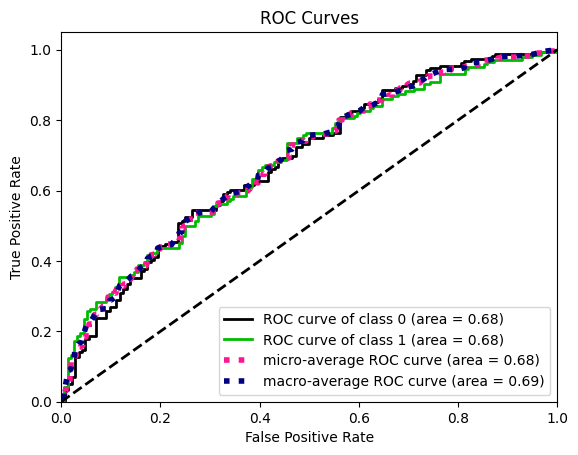

Times Looped: 3it [23:38, 472.20s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 2000}
    Best MSE              : 0.67

    Training
        MSE: 1.000
    Test
        MSE: 0.602
    

NestedCV: 4 of outer fold 10
FGA: 0.10280651396341768
3PA: 0.08826863879587328
FT: 0.08172015105576896
FTA: 0.08688153117249524
ORB: 0.07409080267816015
DRB: 0.08657940352326685
AST: 0.08558841758110733
TOV: 0.07085925379551722
PF: 0.08725003617934535
+/-: 0.23595525125504788


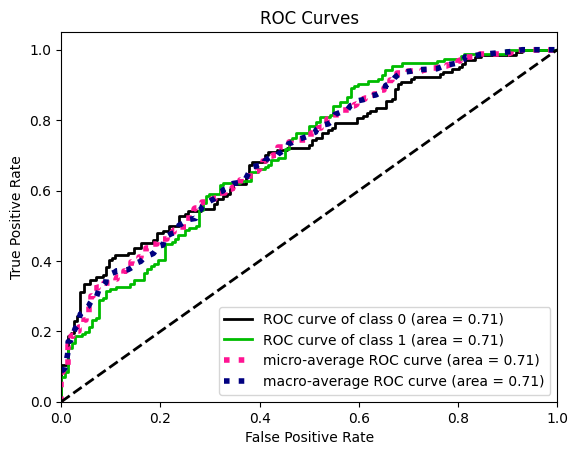

Times Looped: 4it [31:33, 473.61s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 2000}
    Best MSE              : 0.65

    Training
        MSE: 1.000
    Test
        MSE: 0.652
    

NestedCV: 5 of outer fold 10
FGA: 0.10868361598163713
3PA: 0.08796789675665648
FT: 0.07847905375908082
FTA: 0.08070514767175983
ORB: 0.0735945425079242
DRB: 0.08433573300622478
AST: 0.08808876911002275
TOV: 0.07829076608687002
PF: 0.087818064099523
+/-: 0.23203641102030106


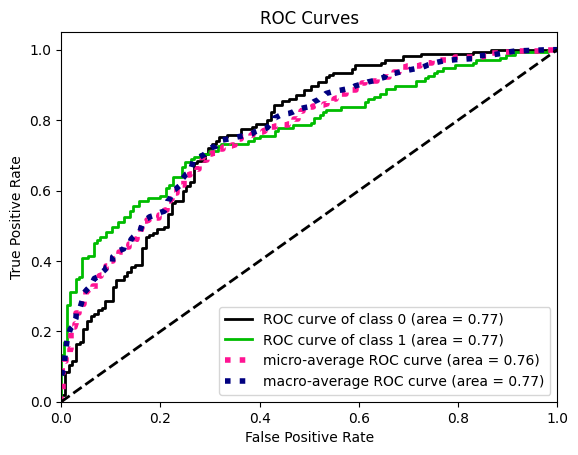

Times Looped: 5it [39:51, 482.18s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 2000}
    Best MSE              : 0.65

    Training
        MSE: 1.000
    Test
        MSE: 0.685
    

NestedCV: 6 of outer fold 10
FGA: 0.10159243548733506
3PA: 0.0848943671433321
FT: 0.07766285553287061
FTA: 0.0887203158839451
ORB: 0.07807097118719594
DRB: 0.08988674212344332
AST: 0.09011132706190975
TOV: 0.07799923451841172
PF: 0.08758359261365926
+/-: 0.22347815844789698


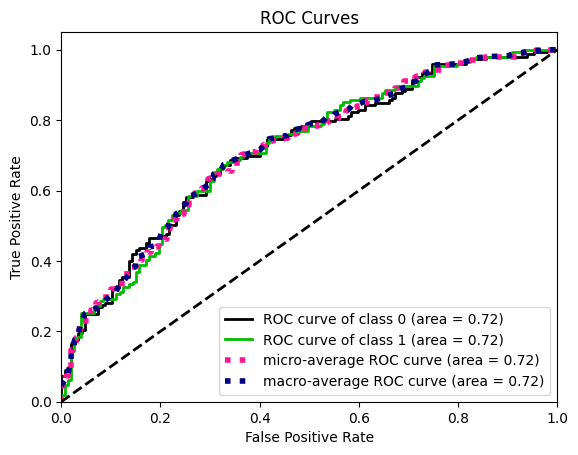

Times Looped: 6it [48:14, 489.26s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2000}
    Best MSE              : 0.66

    Training
        MSE: 1.000
    Test
        MSE: 0.636
    

NestedCV: 7 of outer fold 10
FGA: 0.09979363755326956
3PA: 0.08813225674027922
FT: 0.07883707962465963
FTA: 0.08684807532292801
ORB: 0.07197571544713499
DRB: 0.08978806939150279
AST: 0.08952879510477889
TOV: 0.07353470613556168
PF: 0.08651230570535522
+/-: 0.23504935897453008


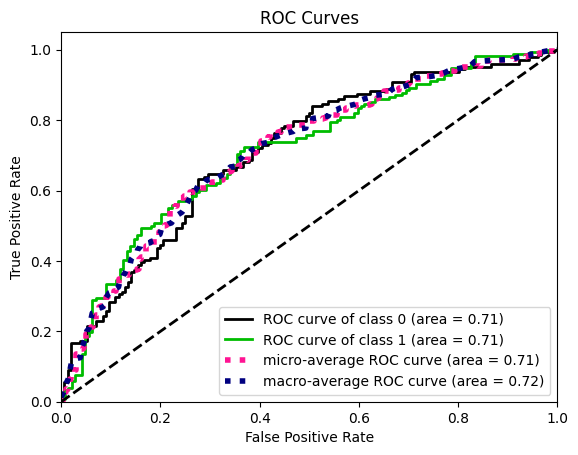

Times Looped: 7it [56:19, 488.06s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 2000}
    Best MSE              : 0.67

    Training
        MSE: 1.000
    Test
        MSE: 0.641
    

NestedCV: 8 of outer fold 10
FGA: 0.10266283615197157
3PA: 0.08676796136781063
FT: 0.08013845164136398
FTA: 0.09017395016138999
ORB: 0.07057378570885202
DRB: 0.0906432481723554
AST: 0.0862439984603046
TOV: 0.07313013344336136
PF: 0.09109041089933459
+/-: 0.22857522399325578


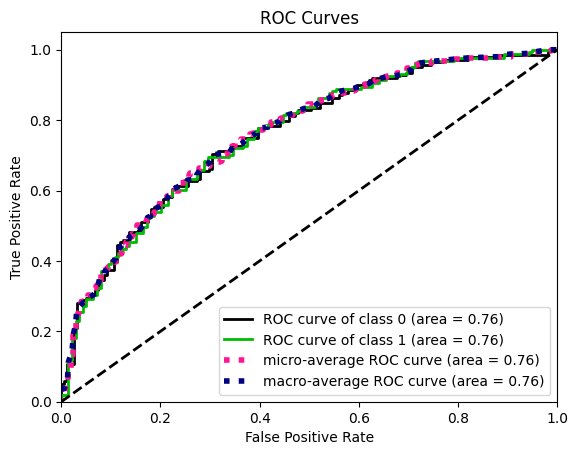

Times Looped: 8it [1:04:26, 487.51s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 2000}
    Best MSE              : 0.66

    Training
        MSE: 1.000
    Test
        MSE: 0.700
    

NestedCV: 9 of outer fold 10
FGA: 0.09785052633286437
3PA: 0.08759900412942137
FT: 0.07742514121908964
FTA: 0.09133939816414435
ORB: 0.07211093562348102
DRB: 0.08664650697021241
AST: 0.08457013324459911
TOV: 0.07370121205188757
PF: 0.09161800812103078
+/-: 0.23713913414326943


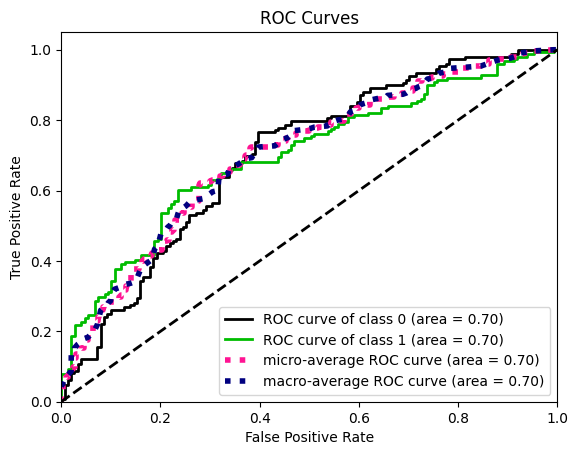

Times Looped: 9it [1:12:28, 486.07s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 2000}
    Best MSE              : 0.66

    Training
        MSE: 1.000
    Test
        MSE: 0.653
    

NestedCV: 10 of outer fold 10
FGA: 0.09855246352475824
3PA: 0.0897628650100623
FT: 0.06981711462320553
FTA: 0.09023672003791948
ORB: 0.07901343739386922
DRB: 0.08559556009262097
AST: 0.08628577838330193
TOV: 0.07817248830467953
PF: 0.08546976059515364
+/-: 0.23709381203442914


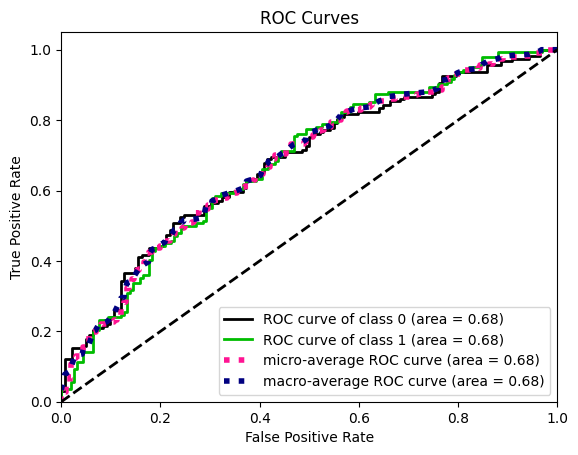

Times Looped: 10it [1:20:22, 482.21s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 1600}
    Best MSE              : 0.65

    Training
        MSE: 1.000
    Test
        MSE: 0.612
    
Overall test performance: 0.65
Averages of feature importance are: 
FGA: [0.10756665222788243, 0.10348967278491032, 0.105391162494695, 0.10280651396341768, 0.10868361598163713, 0.10159243548733506, 0.09979363755326956, 0.10266283615197157, 0.09785052633286437, 0.09855246352475824], std: 0.003428799333050847
3PA: [0.09236789724413003, 0.0840945481556737, 0.0916224490230389, 0.08826863879587328, 0.08796789675665648, 0.0848943671433321, 0.08813225674027922, 0.08676796136781063, 0.08759900412942137, 0.0897628650100623], std: 0.002485092729330063
FT: [0.0750031020360855, 0.07904358489059544, 0.0742958333555552, 0.08172015105576896, 0.07847905375908082, 0.07766285553287061, 0.07883707962465963, 0.08013845164136398, 0.07742514121908964, 0.06981711462320553], s

In [6]:
cv_inner = KFold(n_splits=2, shuffle=True, random_state=42)          #1
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
# 10x2 nested cross validation
# 9 folds for training, 1 fold for testing
# 9 folds --> 50% (training) - 50% (validation) split 
classifier = GradientBoostingClassifier()       # RandomForestClassifier, GradientBoostingClassifier, LogisticRegression        #2

p_grid = {#'bootstrap': [True, False],
        'max_depth': [40, 60, 80],
        'max_features': [None, 'sqrt'],
        'min_samples_leaf': [2, 4, 6, 8],
        'min_samples_split': [2, 4, 6, 8],
        'n_estimators': [1600, 2000]}


history = []
feature_values = [[] for i in range(len(gbc_arr[0])-1)] #will hold feature_importance values from each fold
score_history = [] #will hold scores from each fold
pointer = 1

for train_index, test_index in tqdm(cv_outer.split(gbc_x, y), desc='Times Looped'):                          #3
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv_outer.get_n_splits()))
    x_train, x_test = gbc_x[train_index], gbc_x[test_index] # x (features)
    y_train, y_test = y[train_index], y[test_index] # y (target)

    model = GridSearchCV(classifier, param_grid=p_grid,
                        scoring='f1', cv=cv_inner, n_jobs=-1) # classification --> roc_auc, f1, accuracy   # Grid search  #4x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    

    temp0 = model.fit(x_train, y_train) # trains ML model


    feature_importance = model.best_estimator_.feature_importances_ #prints feature with value of importance
    for i in range(10):
        feature_values[i].append(feature_importance[i])
        print(f'{gbc_temp.columns[i]}: {feature_importance[i]}')

    
    probas = temp0.predict_proba(x_test)
    # Now plot.
    skplt.metrics.plot_roc(y_test, probas)
    plt.show()

    
    pred_test = model.predict(x_test) # predict test data
    pred_training = model.predict(x_train) # predict training data

    
    # Evaluate model performance
    # scikit learn accuracy
    auc_train = f1_score(y_train, pred_training)     #roc_auc_score, f1, accuracy       #5
    auc_test = f1_score(y_test, pred_test)       #roc_auc_score
    score_history.append(auc_test)


    
    print("""
    Best set of parameters: {}
    Best MSE              : {:.2f}

    Training
        MSE: {:.3f}
    Test
        MSE: {:.3f}
    """.format(
        model.best_params_,
        model.best_score_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1

print('Overall test performance: {:.2f}'.format(np.mean(history)))



print('Averages of feature importance are: ') #calculates standard deviation for each feature
for i, feature in enumerate(feature_values):
    print(f'{gbc_temp.columns[i]}: {feature}, std: {np.std(np.array(feature_values[i]), dtype=np.float32)}')


from statistics import mean #calculates the mean
means = []
for i, feature in enumerate(feature_values):
    means.append(mean(feature))
[print(gbc_x) for gbc_x in means]


print(f'std of scores: {np.std(score_history)}')

accuracy

Times Looped: 0it [00:00, ?it/s]


NestedCV: 1 of outer fold 10
FGA: 0.10302517108291952
3PA: 0.08708435057325432
FT: 0.0780445021084523
FTA: 0.08367950551849966
ORB: 0.06745314343610728
DRB: 0.08748025845802478
AST: 0.08585523790086859
TOV: 0.07693354624697674
PF: 0.09120173346146286
+/-: 0.239242551213434


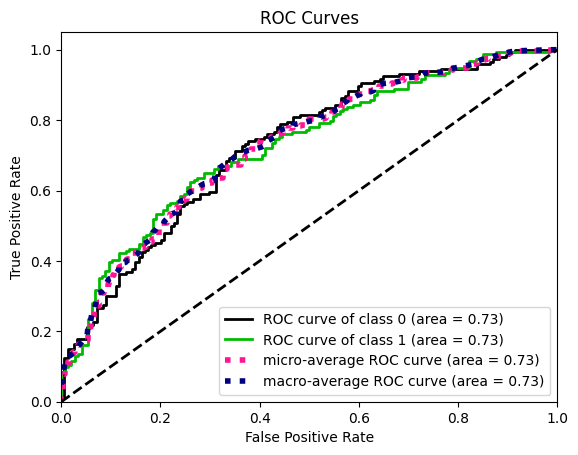

Times Looped: 1it [07:43, 463.86s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 2000}
    Best MSE              : 0.66

    Training
        MSE: 1.000
    Test
        MSE: 0.667
    

NestedCV: 2 of outer fold 10
FGA: 0.1037917990904805
3PA: 0.0919367917337822
FT: 0.07744112441867368
FTA: 0.0827363795629409
ORB: 0.07377218843046177
DRB: 0.08250158527951776
AST: 0.09349792582028851
TOV: 0.07780377047312646
PF: 0.09337900824687456
+/-: 0.2231394269438535


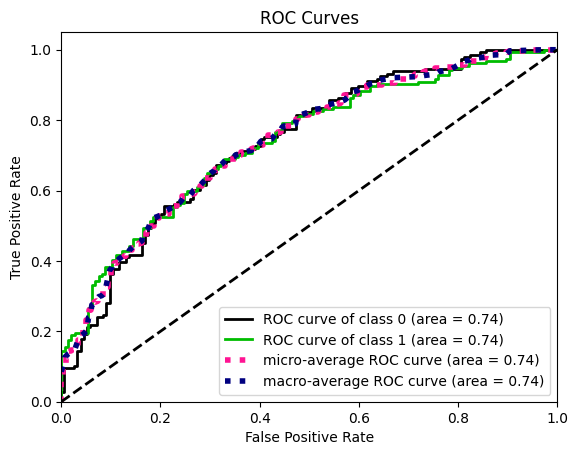

Times Looped: 2it [15:39, 470.88s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 2000}
    Best MSE              : 0.67

    Training
        MSE: 1.000
    Test
        MSE: 0.670
    

NestedCV: 3 of outer fold 10
FGA: 0.09785424368479546
3PA: 0.08331934580871843
FT: 0.07628619915212327
FTA: 0.0913010239972893
ORB: 0.07452768487268191
DRB: 0.08658622364898921
AST: 0.08641085696611482
TOV: 0.07316628373702193
PF: 0.0947505391038587
+/-: 0.2357975990284069


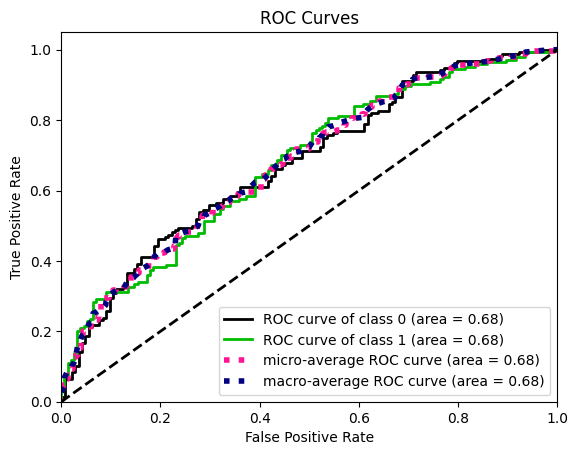

Times Looped: 3it [23:25, 468.68s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 2000}
    Best MSE              : 0.66

    Training
        MSE: 1.000
    Test
        MSE: 0.597
    

NestedCV: 4 of outer fold 10
FGA: 0.10397098451109812
3PA: 0.08875640872917265
FT: 0.08148709269718163
FTA: 0.08525280405853596
ORB: 0.07403669798295404
DRB: 0.08725452091731759
AST: 0.08572198270556376
TOV: 0.07047650980293597
PF: 0.09201332818850391
+/-: 0.2310296704067364


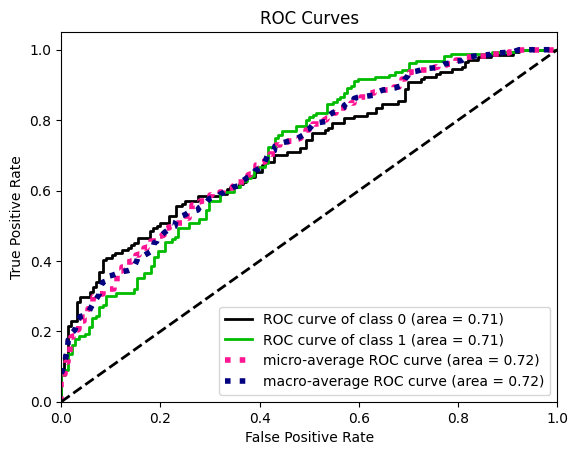

Times Looped: 4it [31:15, 469.15s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 2000}
    Best MSE              : 0.65

    Training
        MSE: 1.000
    Test
        MSE: 0.627
    

NestedCV: 5 of outer fold 10
FGA: 0.09814463290971188
3PA: 0.08553152631006708
FT: 0.07766577761474316
FTA: 0.08854665767307601
ORB: 0.07504227435337552
DRB: 0.09000542666507731
AST: 0.08809379523277562
TOV: 0.07736295200390007
PF: 0.08751293576835484
+/-: 0.23209402146891842


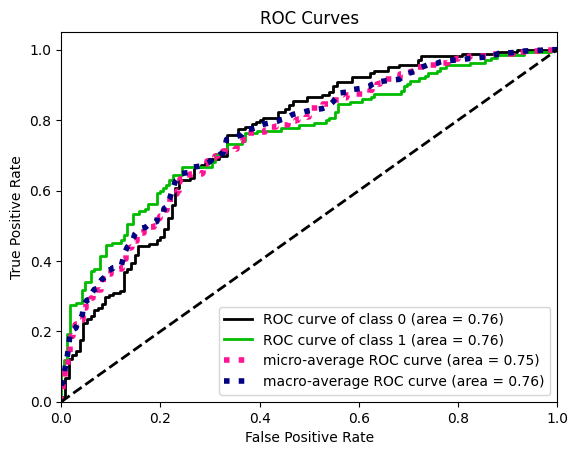

Times Looped: 5it [39:08, 470.54s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1600}
    Best MSE              : 0.65

    Training
        MSE: 1.000
    Test
        MSE: 0.693
    

NestedCV: 6 of outer fold 10
FGA: 0.09975613420285051
3PA: 0.0853668652141155
FT: 0.0791092721340542
FTA: 0.0862459510499052
ORB: 0.07552012327436534
DRB: 0.09444435567506772
AST: 0.08389956001185168
TOV: 0.07615894757002366
PF: 0.08235952618796177
+/-: 0.23713926467980445


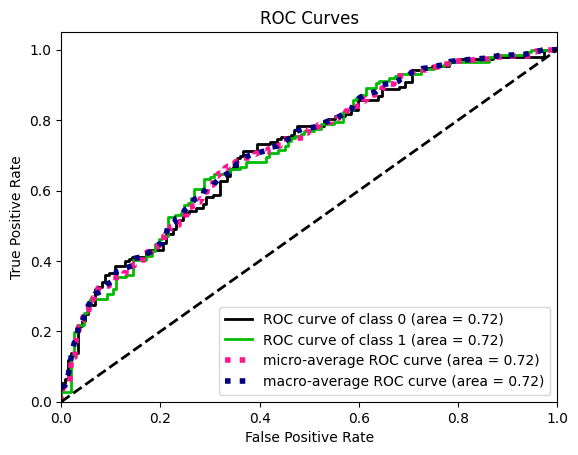

Times Looped: 6it [46:53, 468.52s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 2000}
    Best MSE              : 0.65

    Training
        MSE: 1.000
    Test
        MSE: 0.667
    

NestedCV: 7 of outer fold 10
FGA: 0.10939583743472231
3PA: 0.08470406633843192
FT: 0.07587588127149719
FTA: 0.08505165648984332
ORB: 0.07594902521075282
DRB: 0.09090025610690182
AST: 0.08842271386293322
TOV: 0.07399318126065801
PF: 0.08889875606468008
+/-: 0.22680862595957932


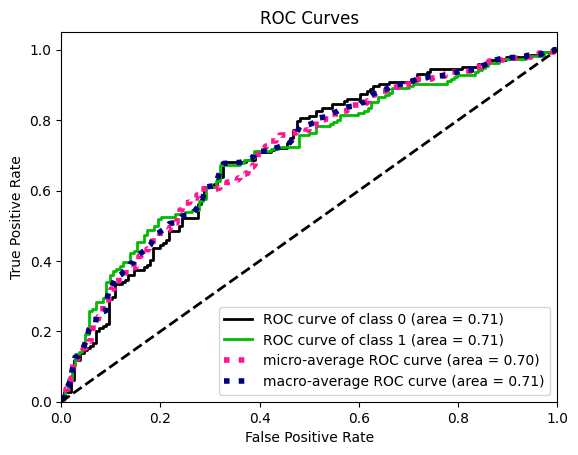

Times Looped: 7it [54:36, 466.91s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1600}
    Best MSE              : 0.67

    Training
        MSE: 1.000
    Test
        MSE: 0.640
    

NestedCV: 8 of outer fold 10
FGA: 0.1005814728575015
3PA: 0.08828004215362692
FT: 0.08178996343815649
FTA: 0.09278540632116282
ORB: 0.07067036330975333
DRB: 0.0896353552725072
AST: 0.08397989795581952
TOV: 0.07220714190416079
PF: 0.08828937361876452
+/-: 0.231780983168547


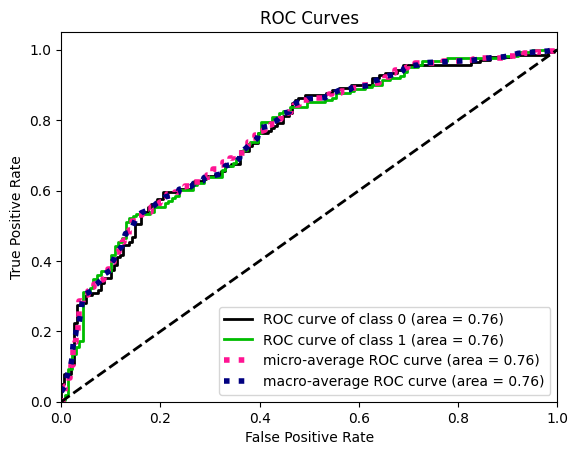

Times Looped: 8it [1:02:15, 464.24s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 1600}
    Best MSE              : 0.66

    Training
        MSE: 1.000
    Test
        MSE: 0.673
    

NestedCV: 9 of outer fold 10
FGA: 0.09747959815741819
3PA: 0.08705892191335379
FT: 0.08093454478904057
FTA: 0.0897186396192718
ORB: 0.0678299428395816
DRB: 0.08460929358740123
AST: 0.08885985496352287
TOV: 0.07072624666332471
PF: 0.09292804596533118
+/-: 0.23985491150175414


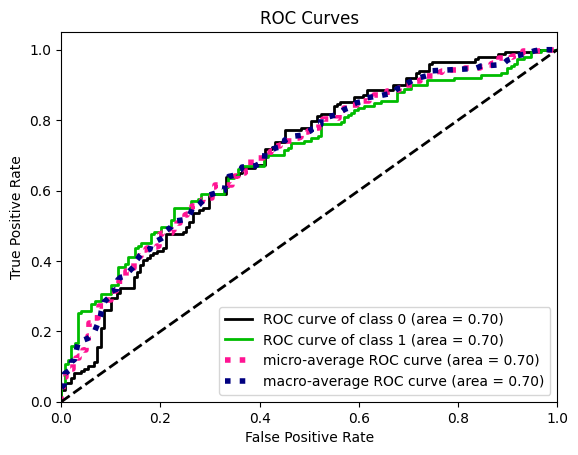

Times Looped: 9it [1:10:03, 465.51s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 2000}
    Best MSE              : 0.67

    Training
        MSE: 1.000
    Test
        MSE: 0.643
    

NestedCV: 10 of outer fold 10
FGA: 0.10193769988725129
3PA: 0.08502214437008292
FT: 0.07353805779000248
FTA: 0.09077061476345777
ORB: 0.0759649763892762
DRB: 0.08860868882956738
AST: 0.08656138649679665
TOV: 0.07675143340203092
PF: 0.08749939826098399
+/-: 0.23334559981055042


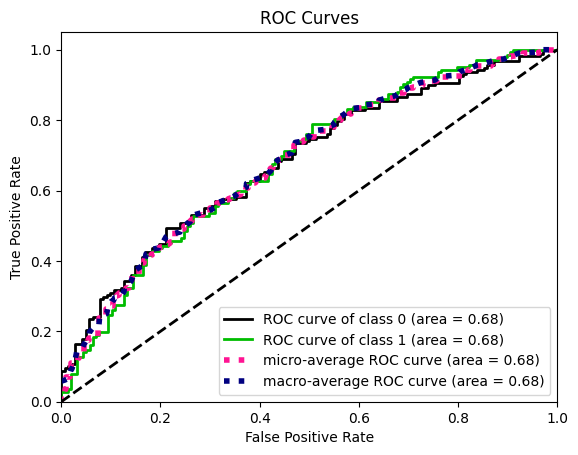

Times Looped: 10it [1:17:39, 465.91s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 2000}
    Best MSE              : 0.65

    Training
        MSE: 1.000
    Test
        MSE: 0.620
    
Overall test performance: 0.65
Averages of feature importance are: 
FGA: [0.10302517108291952, 0.1037917990904805, 0.09785424368479546, 0.10397098451109812, 0.09814463290971188, 0.09975613420285051, 0.10939583743472231, 0.1005814728575015, 0.09747959815741819, 0.10193769988725129], std: 0.003474630881100893
3PA: [0.08708435057325432, 0.0919367917337822, 0.08331934580871843, 0.08875640872917265, 0.08553152631006708, 0.0853668652141155, 0.08470406633843192, 0.08828004215362692, 0.08705892191335379, 0.08502214437008292], std: 0.0023621150758117437
FT: [0.0780445021084523, 0.07744112441867368, 0.07628619915212327, 0.08148709269718163, 0.07766577761474316, 0.0791092721340542, 0.07587588127149719, 0.08178996343815649, 0.08093454478904057, 0.0735380577900024

In [7]:
cv_inner = KFold(n_splits=2, shuffle=True, random_state=42)          #1
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
# 10x2 nested cross validation
# 9 folds for training, 1 fold for testing
# 9 folds --> 50% (training) - 50% (validation) split 
classifier = GradientBoostingClassifier()       # RandomForestClassifier, GradientBoostingClassifier, LogisticRegression        #2

p_grid = {#'bootstrap': [True, False],
        'max_depth': [40, 60, 80],
        'max_features': [None, 'sqrt'],
        'min_samples_leaf': [2, 4, 6, 8],
        'min_samples_split': [2, 4, 6, 8],
        'n_estimators': [1600, 2000]}


history = []
feature_values = [[] for i in range(len(gbc_arr[0])-1)] #will hold feature_importance values from each fold
score_history = [] #will hold scores from each fold
pointer = 1

for train_index, test_index in tqdm(cv_outer.split(gbc_x, y), desc='Times Looped'):                          #3
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv_outer.get_n_splits()))
    x_train, x_test = gbc_x[train_index], gbc_x[test_index] # x (features)
    y_train, y_test = y[train_index], y[test_index] # y (target)

    model = GridSearchCV(classifier, param_grid=p_grid,
                        scoring='accuracy', cv=cv_inner, n_jobs=-1) # classification --> roc_auc, f1, accuracy   # Grid search  #4x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    

    temp0 = model.fit(x_train, y_train) # trains ML model


    feature_importance = model.best_estimator_.feature_importances_ #prints feature with value of importance
    for i in range(10):
        feature_values[i].append(feature_importance[i])
        print(f'{gbc_temp.columns[i]}: {feature_importance[i]}')

    
    probas = temp0.predict_proba(x_test)
    # Now plot.
    skplt.metrics.plot_roc(y_test, probas)
    plt.show()

    
    pred_test = model.predict(x_test) # predict test data
    pred_training = model.predict(x_train) # predict training data

    
    # Evaluate model performance
    # scikit learn accuracy
    auc_train = accuracy_score(y_train, pred_training)     #roc_auc_score, f1, accuracy       #5
    auc_test = accuracy_score(y_test, pred_test)       #roc_auc_score
    score_history.append(auc_test)


    
    print("""
    Best set of parameters: {}
    Best MSE              : {:.2f}

    Training
        MSE: {:.3f}
    Test
        MSE: {:.3f}
    """.format(
        model.best_params_,
        model.best_score_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1

print('Overall test performance: {:.2f}'.format(np.mean(history)))



print('Averages of feature importance are: ') #calculates standard deviation for each feature
for i, feature in enumerate(feature_values):
    print(f'{gbc_temp.columns[i]}: {feature}, std: {np.std(np.array(feature_values[i]), dtype=np.float32)}')


from statistics import mean #calculates the mean
means = []
for i, feature in enumerate(feature_values):
    means.append(mean(feature))
[print(gbc_x) for gbc_x in means]


print(f'std of scores: {np.std(score_history)}')

Random Forest Classifier Models

roc_auc

Times Looped: 0it [00:00, ?it/s]


NestedCV: 1 of outer fold 10
FG: 0.0857495268063492
FGA: 0.06414992786864224
3PA: 0.06000574629393344
FT: 0.06440494468674
FTA: 0.04898652509977101
DRB: 0.08195260405601387
AST: 0.09269835352136023
TOV: 0.051346443778523605
PF: 0.06709062268618977
+/-: 0.3836153052024766


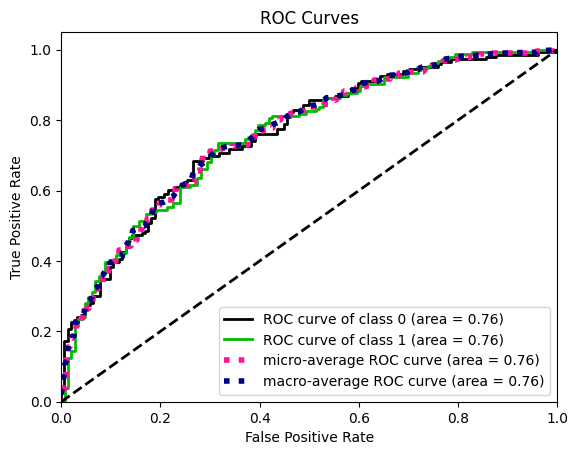

Times Looped: 1it [10:41, 641.08s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 1600}
    Best MSE              : 0.73

    Training
        MSE: 0.816
    Test
        MSE: 0.703
    

NestedCV: 2 of outer fold 10
FG: 0.08279109398320433
FGA: 0.06598812630640427
3PA: 0.05779394548837105
FT: 0.0644965478437404
FTA: 0.048856211162953335
DRB: 0.08005911289871431
AST: 0.09452557782946776
TOV: 0.050299276961497004
PF: 0.07026502290426843
+/-: 0.38492508462137914


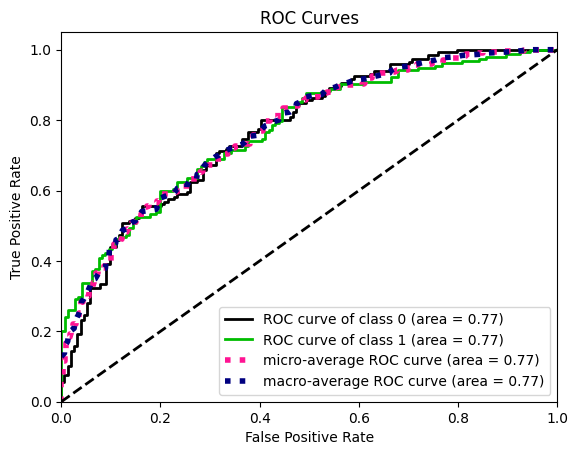

Times Looped: 2it [21:34, 648.43s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 1600}
    Best MSE              : 0.74

    Training
        MSE: 0.808
    Test
        MSE: 0.690
    

NestedCV: 3 of outer fold 10
FG: 0.08491027521766437
FGA: 0.06549570854685864
3PA: 0.05973938988216674
FT: 0.06398734329226832
FTA: 0.04870460372466946
DRB: 0.0753746127392862
AST: 0.0859932259744282
TOV: 0.05112246164087414
PF: 0.06838716193761046
+/-: 0.39628521704417347


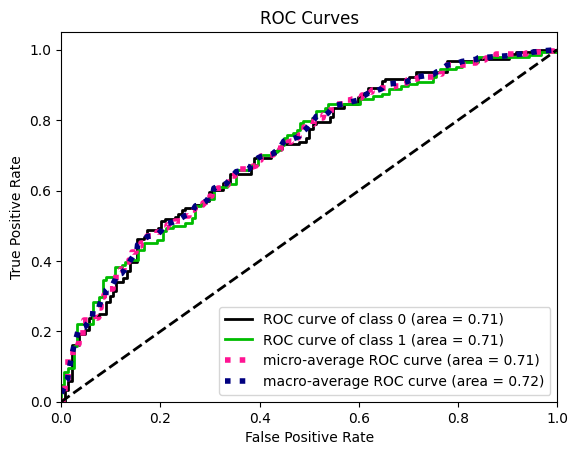

Times Looped: 3it [32:19, 646.63s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 2000}
    Best MSE              : 0.74

    Training
        MSE: 0.813
    Test
        MSE: 0.647
    

NestedCV: 4 of outer fold 10
FG: 0.08439887276657056
FGA: 0.06454078283754502
3PA: 0.058350856712831446
FT: 0.06638444196476884
FTA: 0.04969334660884459
DRB: 0.07590374442871022
AST: 0.08663078263977142
TOV: 0.04950584686906157
PF: 0.07231652908748876
+/-: 0.3922747960844076


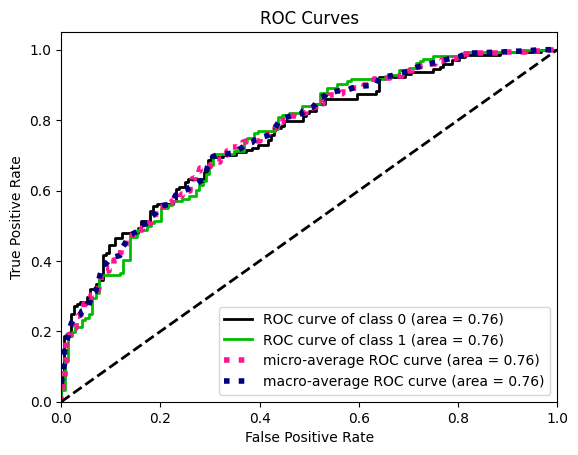

Times Looped: 4it [42:52, 641.52s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 1600}
    Best MSE              : 0.73

    Training
        MSE: 0.813
    Test
        MSE: 0.679
    

NestedCV: 5 of outer fold 10
FG: 0.08406752866272567
FGA: 0.06580995128937561
3PA: 0.06081882176988067
FT: 0.06676905578477368
FTA: 0.04976228982734281
DRB: 0.0748850219847274
AST: 0.08923350081341144
TOV: 0.05019685952436273
PF: 0.06574240243297984
+/-: 0.39271456791042014


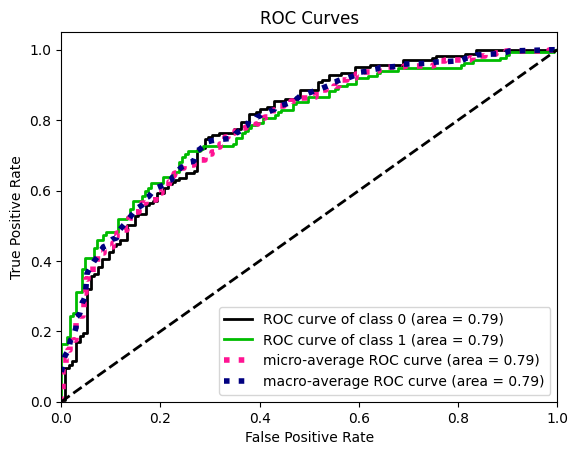

Times Looped: 5it [53:26, 638.86s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 1600}
    Best MSE              : 0.73

    Training
        MSE: 0.812
    Test
        MSE: 0.702
    

NestedCV: 6 of outer fold 10
FG: 0.08056877075897212
FGA: 0.06480440320532874
3PA: 0.058913696264596194
FT: 0.06422339892814088
FTA: 0.048324073832290745
DRB: 0.07631772034177876
AST: 0.09369119750369936
TOV: 0.05233919902239819
PF: 0.06491932088034287
+/-: 0.3958982192624521


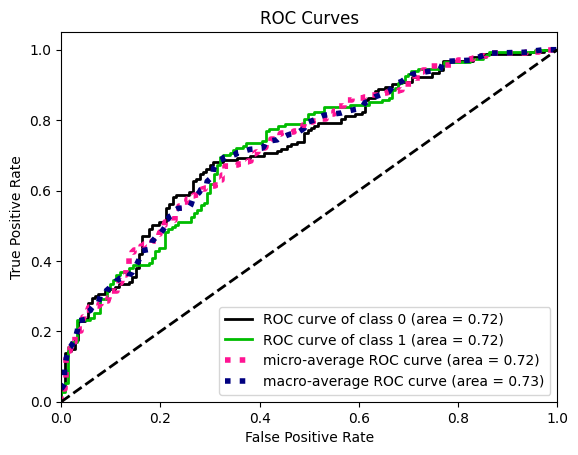

Times Looped: 6it [1:03:52, 634.27s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 2000}
    Best MSE              : 0.74

    Training
        MSE: 0.811
    Test
        MSE: 0.670
    

NestedCV: 7 of outer fold 10
FG: 0.08358288893534992
FGA: 0.0643510300790051
3PA: 0.059433107363774135
FT: 0.06451713458598379
FTA: 0.047628203773865646
DRB: 0.07851108630298302
AST: 0.08974958667776375
TOV: 0.05055090793738005
PF: 0.06666974008382397
+/-: 0.39500631426007066


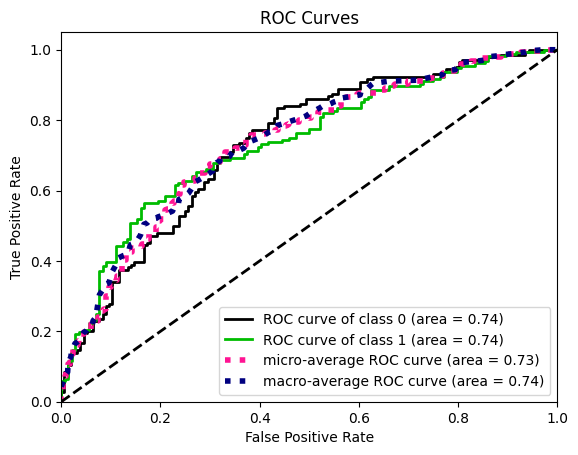

Times Looped: 7it [1:14:24, 633.53s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 1600}
    Best MSE              : 0.74

    Training
        MSE: 0.815
    Test
        MSE: 0.682
    

NestedCV: 8 of outer fold 10
FG: 0.08463854724273666
FGA: 0.06734517568865918
3PA: 0.06213050849850706
FT: 0.07104442148719362
FTA: 0.04976977960923859
DRB: 0.07513805039286248
AST: 0.08429694066833708
TOV: 0.04927712145640106
PF: 0.07052749307333409
+/-: 0.38583196188273017


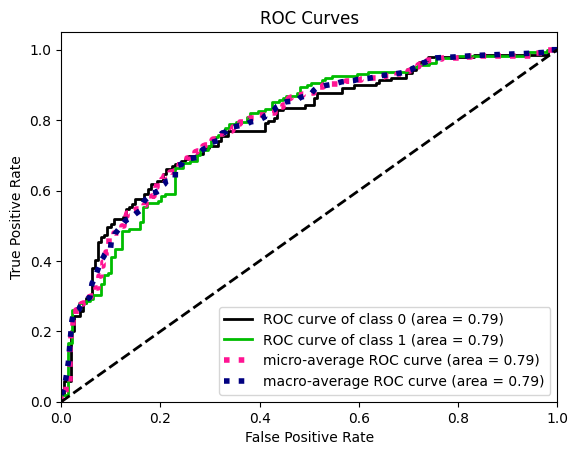

Times Looped: 8it [1:24:48, 630.51s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 2000}
    Best MSE              : 0.73

    Training
        MSE: 0.810
    Test
        MSE: 0.715
    

NestedCV: 9 of outer fold 10
FG: 0.08171800451104858
FGA: 0.06198027482482819
3PA: 0.06108035971186791
FT: 0.06510540913179604
FTA: 0.04556757740516875
DRB: 0.07932855435140956
AST: 0.09070126344993
TOV: 0.04846298007410817
PF: 0.0677910493469364
+/-: 0.3982645271929066


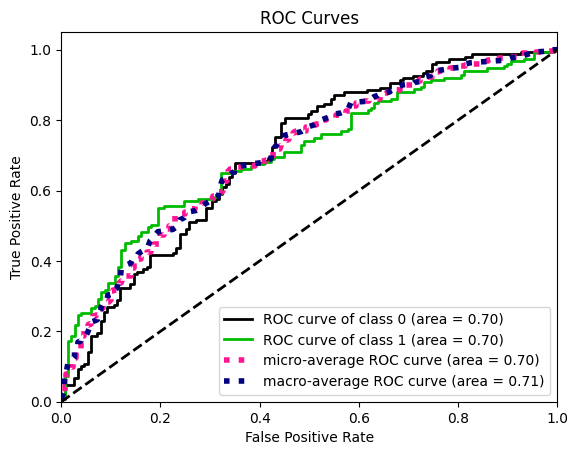

Times Looped: 9it [1:35:08, 627.33s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 2000}
    Best MSE              : 0.75

    Training
        MSE: 0.819
    Test
        MSE: 0.660
    

NestedCV: 10 of outer fold 10
FG: 0.08042575514443225
FGA: 0.06438352716820936
3PA: 0.05803517546043852
FT: 0.06272563149045987
FTA: 0.04888209362210058
DRB: 0.07796273195862567
AST: 0.09654107918276843
TOV: 0.050945552271139845
PF: 0.06731129864489953
+/-: 0.3927871550569262


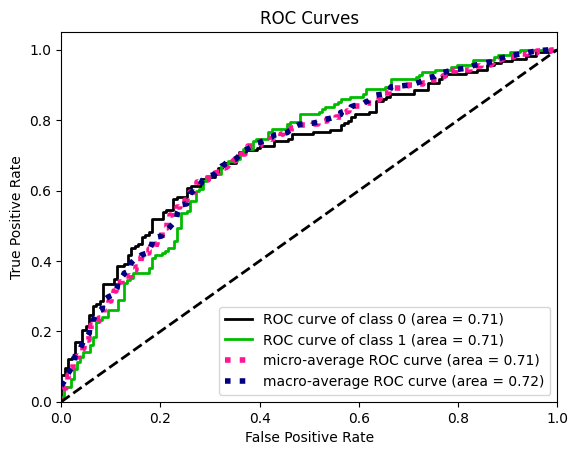

Times Looped: 10it [1:45:28, 632.89s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 1600}
    Best MSE              : 0.75

    Training
        MSE: 0.821
    Test
        MSE: 0.667
    
Overall test performance: 0.68
Averages of feature importance are: 
FG: [0.0857495268063492, 0.08279109398320433, 0.08491027521766437, 0.08439887276657056, 0.08406752866272567, 0.08056877075897212, 0.08358288893534992, 0.08463854724273666, 0.08171800451104858, 0.08042575514443225], std: 0.0017533369828015566
FGA: [0.06414992786864224, 0.06598812630640427, 0.06549570854685864, 0.06454078283754502, 0.06580995128937561, 0.06480440320532874, 0.0643510300790051, 0.06734517568865918, 0.06198027482482819, 0.06438352716820936], std: 0.0013467438984662294
3PA: [0.06000574629393344, 0.05779394548837105, 0.05973938988216674, 0.058350856712831446, 0.06081882176988067, 0.058913696264596194, 0.059433107363774135, 0.06213050849850706, 0.06108035971186791, 0.05803517

In [8]:
cv_inner = KFold(n_splits=2, shuffle=True, random_state=42)          #1
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
# 10x2 nested cross validation
# 9 folds for training, 1 fold for testing
# 9 folds --> 50% (training) - 50% (validation) split 
classifier = RandomForestClassifier()       # RandomForestClassifier, GradientBoostingClassifier, LogisticRegression        #2

p_grid = {#'bootstrap': [True, False],
        'max_depth': [40, 60, 80],
        'max_features': [None, 'sqrt'],
        'min_samples_leaf': [2, 4, 6, 8],
        'min_samples_split': [2, 4, 6, 8],
        'n_estimators': [1600, 2000]}


history = []
feature_values = [[] for i in range(len(rfc_arr[0])-1)] #will hold feature_importance values from each fold
score_history = [] #will hold scores from each fold
pointer = 1

for train_index, test_index in tqdm(cv_outer.split(rfc_x, y), desc='Times Looped'):                          #3
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv_outer.get_n_splits()))
    x_train, x_test = rfc_x[train_index], rfc_x[test_index] # x (features)
    y_train, y_test = y[train_index], y[test_index] # y (target)

    model = GridSearchCV(classifier, param_grid=p_grid,
                        scoring='roc_auc', cv=cv_inner, n_jobs=-1) # classification --> roc_auc, f1, accuracy   # Grid search  #4x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    

    temp0 = model.fit(x_train, y_train) # trains ML model


    feature_importance = model.best_estimator_.feature_importances_ #prints feature with value of importance
    for i in range(10):
        feature_values[i].append(feature_importance[i])
        print(f'{rfc_temp.columns[i]}: {feature_importance[i]}')

    
    probas = temp0.predict_proba(x_test)
    # Now plot.
    skplt.metrics.plot_roc(y_test, probas)
    plt.show()

    
    pred_test = model.predict(x_test) # predict test data
    pred_training = model.predict(x_train) # predict training data

    
    # Evaluate model performance
    # scikit learn accuracy
    auc_train = roc_auc_score(y_train, pred_training)     #roc_auc_score, f1, accuracy       #5
    auc_test = roc_auc_score(y_test, pred_test)       #roc_auc_score
    score_history.append(auc_test)


    
    print("""
    Best set of parameters: {}
    Best MSE              : {:.2f}

    Training
        MSE: {:.3f}
    Test
        MSE: {:.3f}
    """.format(
        model.best_params_,
        model.best_score_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1

print('Overall test performance: {:.2f}'.format(np.mean(history)))



print('Averages of feature importance are: ') #calculates standard deviation for each feature
for i, feature in enumerate(feature_values):
    print(f'{rfc_temp.columns[i]}: {feature}, std: {np.std(np.array(feature_values[i]), dtype=np.float32)}')


from statistics import mean #calculates the mean
means = []
for i, feature in enumerate(feature_values):
    means.append(mean(feature))
[print(rfc_x) for rfc_x in means]


print(f'std of scores: {np.std(score_history)}')

f1

Times Looped: 0it [00:00, ?it/s]


NestedCV: 1 of outer fold 10
FG: 0.08942795167237921
FGA: 0.06927174536313961
3PA: 0.06443180174202272
FT: 0.06981805684629772
FTA: 0.054127336438141334
DRB: 0.08316318193107139
AST: 0.09035970132248015
TOV: 0.05622972220090005
PF: 0.07081018212663595
+/-: 0.35236032035693166


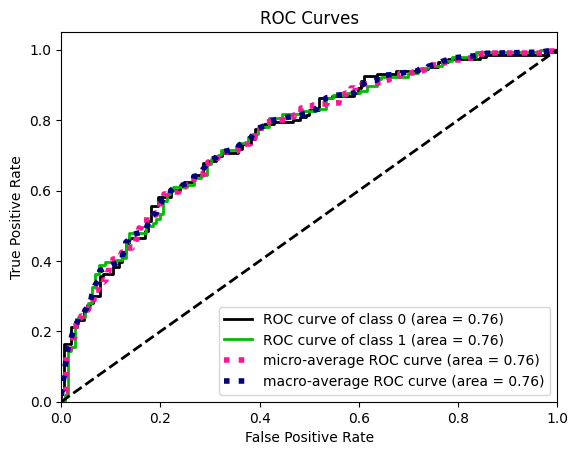

Times Looped: 1it [10:31, 631.45s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 2000}
    Best MSE              : 0.67

    Training
        MSE: 0.847
    Test
        MSE: 0.697
    

NestedCV: 2 of outer fold 10
FG: 0.09315211570765623
FGA: 0.07586076949186109
3PA: 0.06798442813816466
FT: 0.07544091131414976
FTA: 0.060526241603714954
DRB: 0.08658895157246442
AST: 0.09273943959475142
TOV: 0.06240023813230868
PF: 0.08105628816805123
+/-: 0.3042506162768774


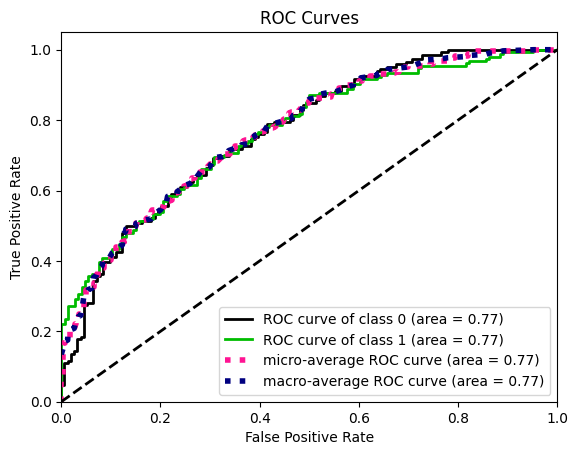

Times Looped: 2it [21:17, 640.03s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 2000}
    Best MSE              : 0.69

    Training
        MSE: 0.907
    Test
        MSE: 0.695
    

NestedCV: 3 of outer fold 10
FG: 0.08452824194531464
FGA: 0.06556442648021132
3PA: 0.05965855937954589
FT: 0.06464125707516721
FTA: 0.04909654941150766
DRB: 0.07536407913852526
AST: 0.08629658026408893
TOV: 0.05134829614182441
PF: 0.06770137871426779
+/-: 0.3958006314495468


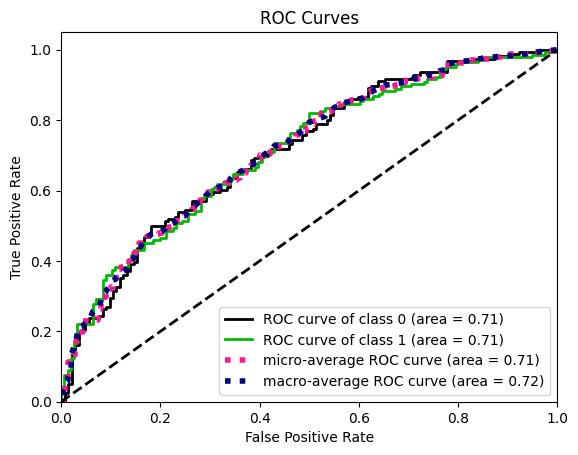

Times Looped: 3it [32:04, 643.41s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 2000}
    Best MSE              : 0.69

    Training
        MSE: 0.813
    Test
        MSE: 0.638
    

NestedCV: 4 of outer fold 10
FG: 0.08537135423235709
FGA: 0.06483230152267024
3PA: 0.05870657999328439
FT: 0.06670750123053919
FTA: 0.04945707377072263
DRB: 0.07709107467882918
AST: 0.08647830046075475
TOV: 0.04993408658823729
PF: 0.07243627024611828
+/-: 0.388985457276487


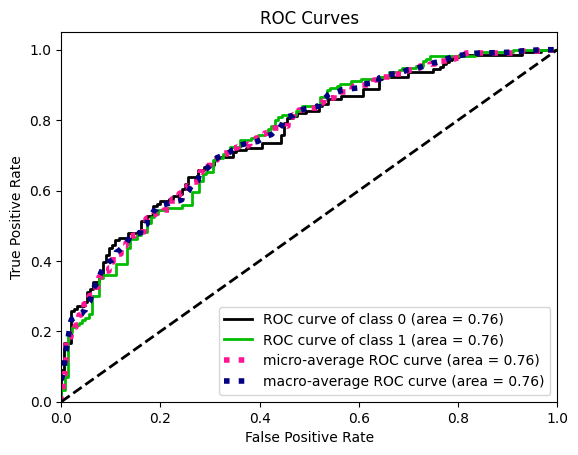

Times Looped: 4it [42:40, 640.34s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 1600}
    Best MSE              : 0.66

    Training
        MSE: 0.811
    Test
        MSE: 0.703
    

NestedCV: 5 of outer fold 10
FG: 0.08470680799833785
FGA: 0.06495144790939185
3PA: 0.06115775122872889
FT: 0.06556337292776288
FTA: 0.04939264512349454
DRB: 0.07483176498383345
AST: 0.08881023015939431
TOV: 0.05022656816636154
PF: 0.06559947259833716
+/-: 0.39475993890435757


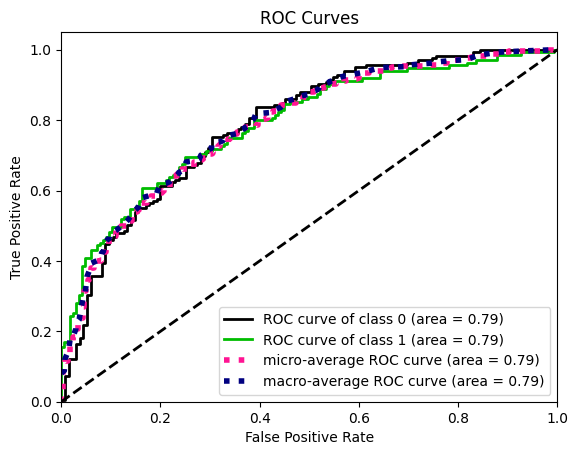

Times Looped: 5it [53:14, 637.94s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 2000}
    Best MSE              : 0.68

    Training
        MSE: 0.815
    Test
        MSE: 0.686
    

NestedCV: 6 of outer fold 10
FG: 0.09372588644871305
FGA: 0.07918646556985495
3PA: 0.07082530157298857
FT: 0.07816829218683095
FTA: 0.06323264508941975
DRB: 0.08597227853392385
AST: 0.09265553088171438
TOV: 0.06901694106135815
PF: 0.08003751556624322
+/-: 0.2871791430889532


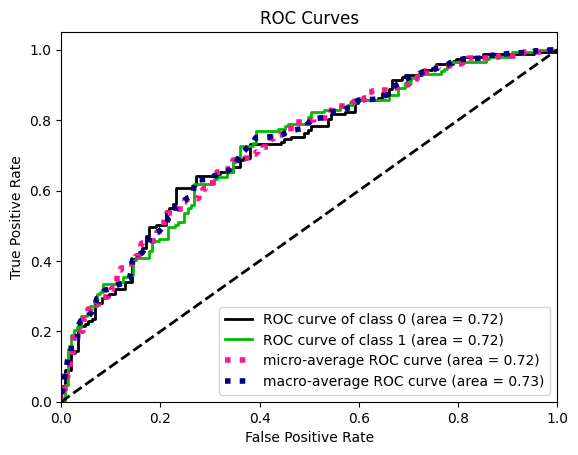

Times Looped: 6it [1:03:35, 632.31s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1600}
    Best MSE              : 0.67

    Training
        MSE: 0.950
    Test
        MSE: 0.641
    

NestedCV: 7 of outer fold 10
FG: 0.08785216359330834
FGA: 0.06955606050250687
3PA: 0.06456396944728471
FT: 0.06930995567366166
FTA: 0.053409552627827935
DRB: 0.08160454684804865
AST: 0.09055662908723414
TOV: 0.05617672182035921
PF: 0.07187428819768749
+/-: 0.3550961122020812


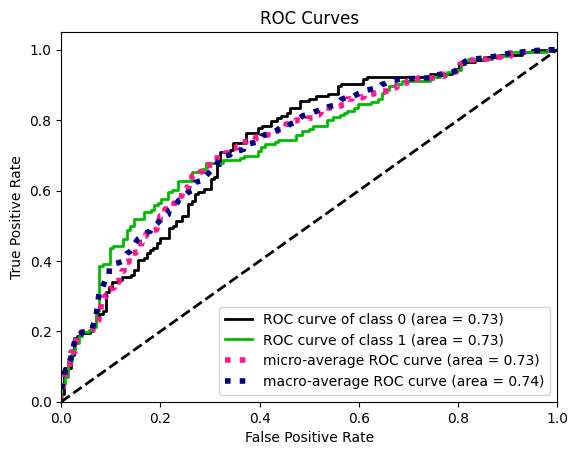

Times Looped: 7it [1:13:57, 628.85s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 1600}
    Best MSE              : 0.68

    Training
        MSE: 0.848
    Test
        MSE: 0.681
    

NestedCV: 8 of outer fold 10
FG: 0.085825487614571
FGA: 0.07498400400065743
3PA: 0.05437018435479008
FT: 0.0729379861840364
FTA: 0.055030867863067545
DRB: 0.06537421073499632
AST: 0.06672299006535133
TOV: 0.05455380755067601
PF: 0.07059065725774887
+/-: 0.39960980437410487


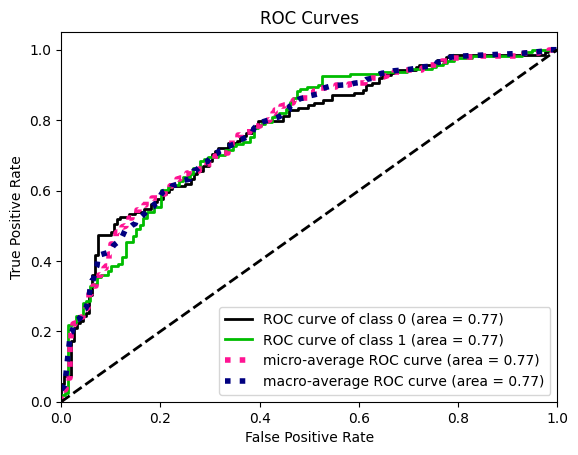

Times Looped: 8it [1:24:30, 630.10s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 1600}
    Best MSE              : 0.67

    Training
        MSE: 0.843
    Test
        MSE: 0.716
    

NestedCV: 9 of outer fold 10
FG: 0.085646528518051
FGA: 0.06735216275411962
3PA: 0.0652764721508293
FT: 0.07108799610320775
FTA: 0.05080112278149765
DRB: 0.08192417984609004
AST: 0.08947664319989752
TOV: 0.05290929486151624
PF: 0.07225554910565982
+/-: 0.363270050679131


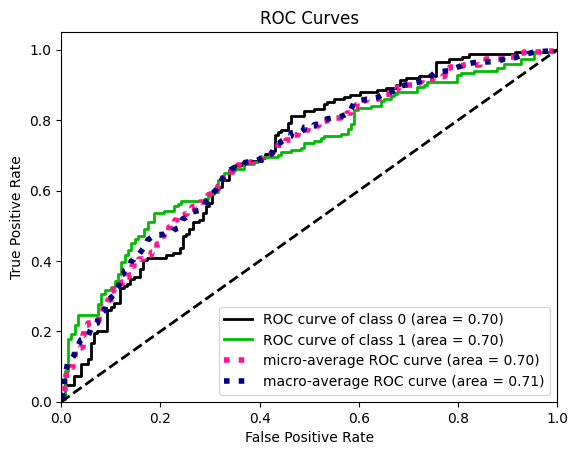

Times Looped: 9it [1:34:42, 624.69s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 1600}
    Best MSE              : 0.69

    Training
        MSE: 0.849
    Test
        MSE: 0.653
    

NestedCV: 10 of outer fold 10
FG: 0.07996210175727723
FGA: 0.06358814680210914
3PA: 0.057985488127322446
FT: 0.06296621256605421
FTA: 0.049509430572320955
DRB: 0.07605402932806123
AST: 0.09641611222051626
TOV: 0.051243679068315756
PF: 0.06779172821091764
+/-: 0.3944830713471053


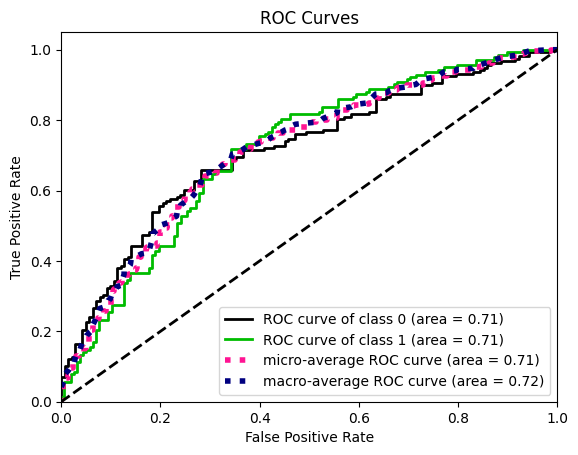

Times Looped: 10it [1:45:03, 630.38s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 2000}
    Best MSE              : 0.68

    Training
        MSE: 0.816
    Test
        MSE: 0.667
    
Overall test performance: 0.68
Averages of feature importance are: 
FG: [0.08942795167237921, 0.09315211570765623, 0.08452824194531464, 0.08537135423235709, 0.08470680799833785, 0.09372588644871305, 0.08785216359330834, 0.085825487614571, 0.085646528518051, 0.07996210175727723], std: 0.0039555965922772884
FGA: [0.06927174536313961, 0.07586076949186109, 0.06556442648021132, 0.06483230152267024, 0.06495144790939185, 0.07918646556985495, 0.06955606050250687, 0.07498400400065743, 0.06735216275411962, 0.06358814680210914], std: 0.005118037573993206
3PA: [0.06443180174202272, 0.06798442813816466, 0.05965855937954589, 0.05870657999328439, 0.06115775122872889, 0.07082530157298857, 0.06456396944728471, 0.05437018435479008, 0.0652764721508293, 0.057985488127322

In [9]:
cv_inner = KFold(n_splits=2, shuffle=True, random_state=42)          #1
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
# 10x2 nested cross validation
# 9 folds for training, 1 fold for testing
# 9 folds --> 50% (training) - 50% (validation) split 
classifier = RandomForestClassifier()       # RandomForestClassifier, GradientBoostingClassifier, LogisticRegression        #2

p_grid = {#'bootstrap': [True, False],
        'max_depth': [40, 60, 80],
        'max_features': [None, 'sqrt'],
        'min_samples_leaf': [2, 4, 6, 8],
        'min_samples_split': [2, 4, 6, 8],
        'n_estimators': [1600, 2000]}


history = []
feature_values = [[] for i in range(len(rfc_arr[0])-1)] #will hold feature_importance values from each fold
score_history = [] #will hold scores from each fold
pointer = 1

for train_index, test_index in tqdm(cv_outer.split(rfc_x, y), desc='Times Looped'):                          #3
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv_outer.get_n_splits()))
    x_train, x_test = rfc_x[train_index], rfc_x[test_index] # x (features)
    y_train, y_test = y[train_index], y[test_index] # y (target)

    model = GridSearchCV(classifier, param_grid=p_grid,
                        scoring='f1', cv=cv_inner, n_jobs=-1) # classification --> roc_auc, f1, accuracy   # Grid search  #4x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    

    temp0 = model.fit(x_train, y_train) # trains ML model


    feature_importance = model.best_estimator_.feature_importances_ #prints feature with value of importance
    for i in range(10):
        feature_values[i].append(feature_importance[i])
        print(f'{rfc_temp.columns[i]}: {feature_importance[i]}')

    
    probas = temp0.predict_proba(x_test)
    # Now plot.
    skplt.metrics.plot_roc(y_test, probas)
    plt.show()

    
    pred_test = model.predict(x_test) # predict test data
    pred_training = model.predict(x_train) # predict training data

    
    # Evaluate model performance
    # scikit learn accuracy
    auc_train = f1_score(y_train, pred_training)     #roc_auc_score, f1, accuracy       #5
    auc_test = f1_score(y_test, pred_test)       #roc_auc_score
    score_history.append(auc_test)


    
    print("""
    Best set of parameters: {}
    Best MSE              : {:.2f}

    Training
        MSE: {:.3f}
    Test
        MSE: {:.3f}
    """.format(
        model.best_params_,
        model.best_score_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1

print('Overall test performance: {:.2f}'.format(np.mean(history)))



print('Averages of feature importance are: ') #calculates standard deviation for each feature
for i, feature in enumerate(feature_values):
    print(f'{rfc_temp.columns[i]}: {feature}, std: {np.std(np.array(feature_values[i]), dtype=np.float32)}')


from statistics import mean #calculates the mean
means = []
for i, feature in enumerate(feature_values):
    means.append(mean(feature))
[print(rfc_x) for rfc_x in means]


print(f'std of scores: {np.std(score_history)}')

accuracy

Times Looped: 0it [00:00, ?it/s]


NestedCV: 1 of outer fold 10
FG: 0.08968493937214501
FGA: 0.06946329285022526
3PA: 0.06419549977112309
FT: 0.07014950571655325
FTA: 0.05412777384258272
DRB: 0.08278510909382028
AST: 0.0923388246358284
TOV: 0.05574602862900388
PF: 0.07121477482091668
+/-: 0.35029425126780145


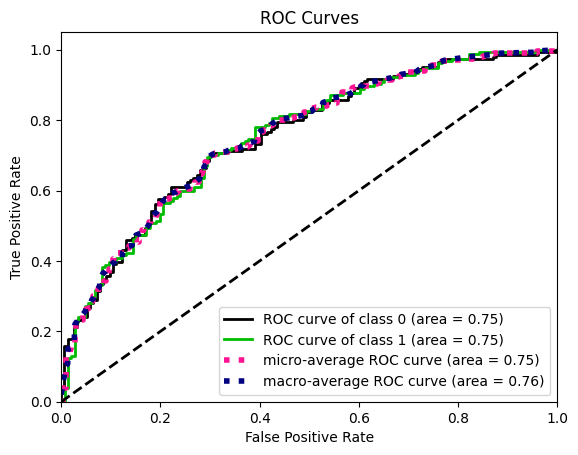

Times Looped: 1it [10:36, 636.59s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 1600}
    Best MSE              : 0.67

    Training
        MSE: 0.847
    Test
        MSE: 0.700
    

NestedCV: 2 of outer fold 10
FG: 0.08801505393873908
FGA: 0.07032623721450737
3PA: 0.0628616431238464
FT: 0.06944136425477185
FTA: 0.0535286286507755
DRB: 0.08260034966315212
AST: 0.0940393437575683
TOV: 0.05509385715849557
PF: 0.07519547402270903
+/-: 0.34889804821543463


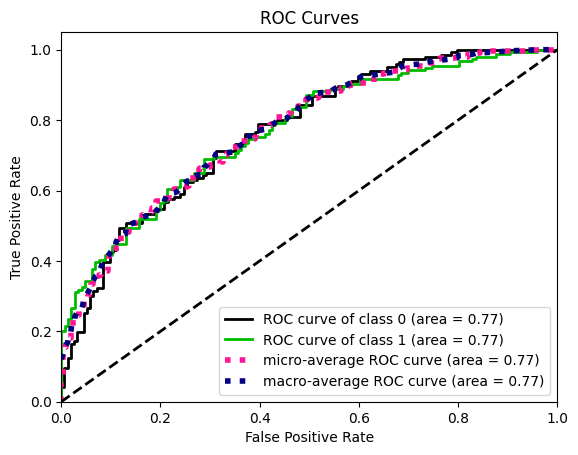

Times Looped: 2it [21:19, 640.09s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 1600}
    Best MSE              : 0.69

    Training
        MSE: 0.845
    Test
        MSE: 0.680
    

NestedCV: 3 of outer fold 10
FG: 0.0836314090422667
FGA: 0.06486637040059141
3PA: 0.059932108923453714
FT: 0.06470568151392617
FTA: 0.048738651395868
DRB: 0.07588023520785789
AST: 0.08670209994419613
TOV: 0.05081705655674205
PF: 0.06817065845147231
+/-: 0.3965557285636257


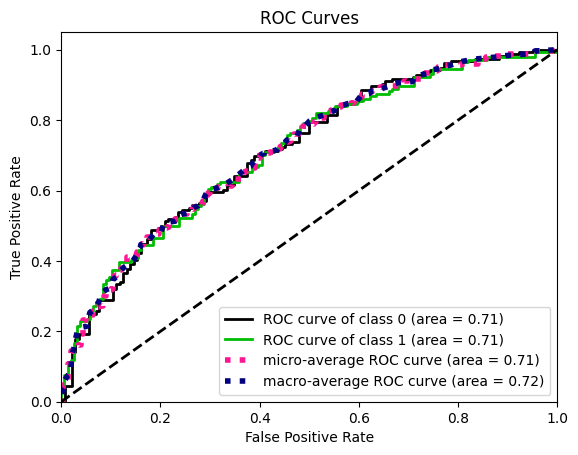

Times Looped: 3it [31:52, 637.00s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 1600}
    Best MSE              : 0.68

    Training
        MSE: 0.814
    Test
        MSE: 0.633
    

NestedCV: 4 of outer fold 10
FG: 0.08351678095678815
FGA: 0.06524155637182075
3PA: 0.058297378351459136
FT: 0.06666845297530107
FTA: 0.049344610937107895
DRB: 0.07607681905813264
AST: 0.0861078488415606
TOV: 0.05036634867405356
PF: 0.07245597112718008
+/-: 0.3919242327065962


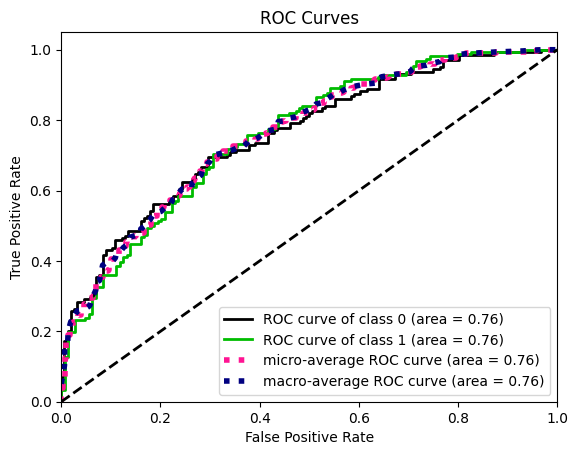

Times Looped: 4it [42:25, 635.50s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 1600}
    Best MSE              : 0.67

    Training
        MSE: 0.810
    Test
        MSE: 0.690
    

NestedCV: 5 of outer fold 10
FG: 0.09435577300950532
FGA: 0.07644141419885228
3PA: 0.07028796271221008
FT: 0.07684736335715259
FTA: 0.06131363477003789
DRB: 0.08165760547034683
AST: 0.08742301131861822
TOV: 0.06271956838088354
PF: 0.0754496338674947
+/-: 0.3135040329148985


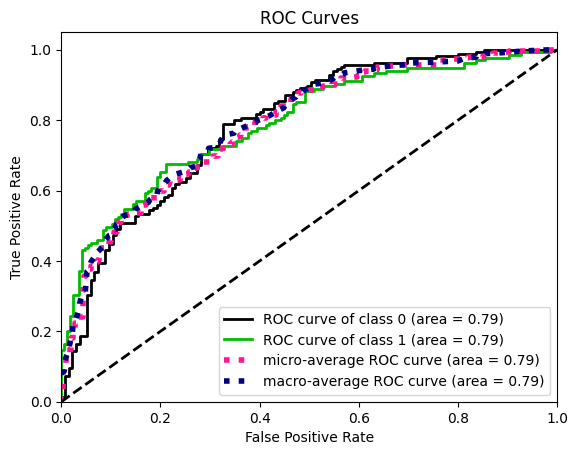

Times Looped: 5it [53:08, 638.28s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 2000}
    Best MSE              : 0.67

    Training
        MSE: 0.901
    Test
        MSE: 0.693
    

NestedCV: 6 of outer fold 10
FG: 0.09349860546237736
FGA: 0.07983883755988434
3PA: 0.0708348452062247
FT: 0.07793492557936943
FTA: 0.06368817881807982
DRB: 0.08576112116470822
AST: 0.09215393297489206
TOV: 0.06827384039414007
PF: 0.07907992991732614
+/-: 0.2889357829229978


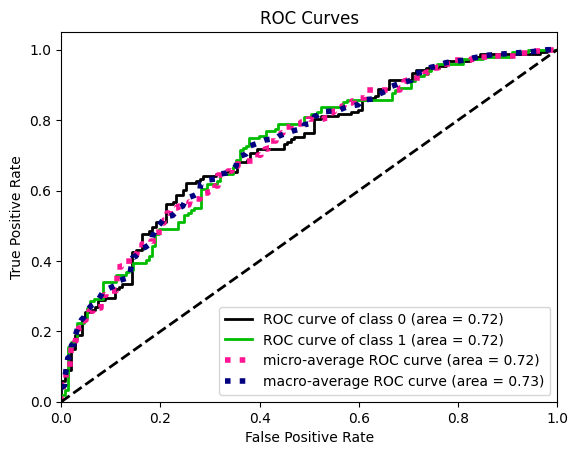

Times Looped: 6it [1:03:52, 640.06s/it]


    Best set of parameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 1600}
    Best MSE              : 0.67

    Training
        MSE: 0.947
    Test
        MSE: 0.657
    

NestedCV: 7 of outer fold 10
FG: 0.08284043779537492
FGA: 0.06447621376764234
3PA: 0.05988675997093572
FT: 0.06465942687850475
FTA: 0.047929794014232356
DRB: 0.07842446665923666
AST: 0.09103515009997652
TOV: 0.050541851758550554
PF: 0.06790429817268238
+/-: 0.39230160088286375


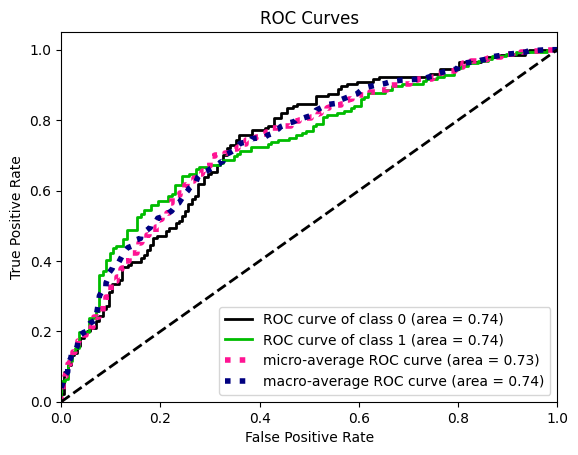

Times Looped: 7it [1:14:09, 632.51s/it]


    Best set of parameters: {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 2000}
    Best MSE              : 0.68

    Training
        MSE: 0.813
    Test
        MSE: 0.697
    

NestedCV: 8 of outer fold 10
FG: 0.08607974900658734
FGA: 0.07495285057847678
3PA: 0.05451307112770931
FT: 0.07287468905832052
FTA: 0.055390528582651706
DRB: 0.0648554015068118
AST: 0.06692840147667728
TOV: 0.054334935872723956
PF: 0.0697096746784041
+/-: 0.40036069811163716


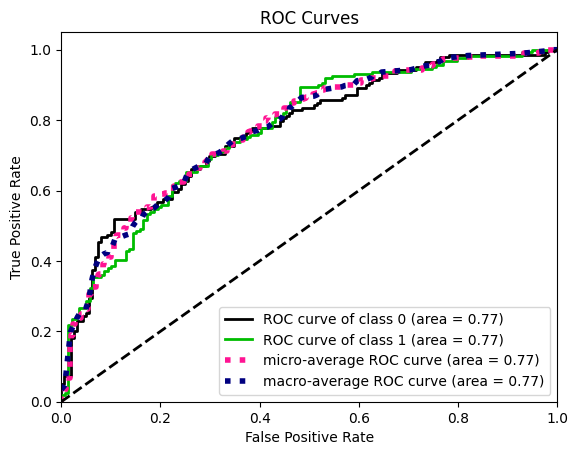

Times Looped: 8it [1:24:31, 629.36s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 2000}
    Best MSE              : 0.67

    Training
        MSE: 0.845
    Test
        MSE: 0.697
    

NestedCV: 9 of outer fold 10
FG: 0.08606743535924985
FGA: 0.06752242759854786
3PA: 0.06437466643427081
FT: 0.07099061356914986
FTA: 0.05086473119825773
DRB: 0.08077927187130897
AST: 0.08999148193452884
TOV: 0.0529058916323344
PF: 0.07290959843125881
+/-: 0.36359388197109277


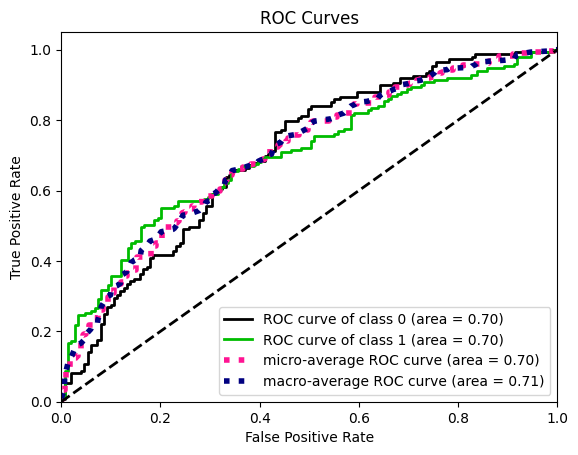

Times Looped: 9it [1:35:02, 629.62s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 2000}
    Best MSE              : 0.69

    Training
        MSE: 0.844
    Test
        MSE: 0.653
    

NestedCV: 10 of outer fold 10
FG: 0.08040048462695107
FGA: 0.06351122159640245
3PA: 0.05810506996526032
FT: 0.06325164322520858
FTA: 0.049444185212030325
DRB: 0.07723944493597891
AST: 0.09583698672959905
TOV: 0.050508732007221994
PF: 0.0679078476752984
+/-: 0.3937943840260489


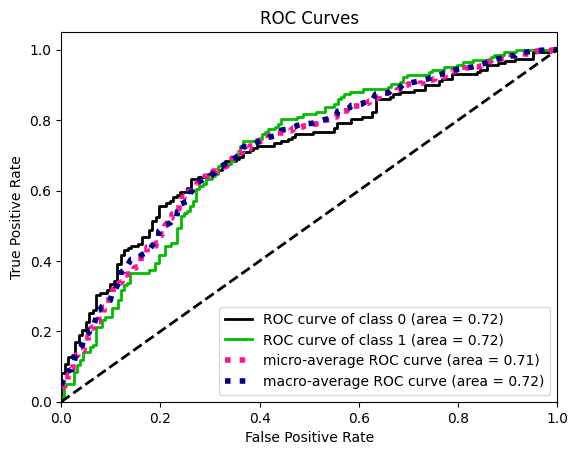

Times Looped: 10it [1:45:32, 633.24s/it]


    Best set of parameters: {'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 2000}
    Best MSE              : 0.68

    Training
        MSE: 0.820
    Test
        MSE: 0.670
    
Overall test performance: 0.68
Averages of feature importance are: 
FG: [0.08968493937214501, 0.08801505393873908, 0.0836314090422667, 0.08351678095678815, 0.09435577300950532, 0.09349860546237736, 0.08284043779537492, 0.08607974900658734, 0.08606743535924985, 0.08040048462695107], std: 0.004361952189356089
FGA: [0.06946329285022526, 0.07032623721450737, 0.06486637040059141, 0.06524155637182075, 0.07644141419885228, 0.07983883755988434, 0.06447621376764234, 0.07495285057847678, 0.06752242759854786, 0.06351122159640245], std: 0.0053837052546441555
3PA: [0.06419549977112309, 0.0628616431238464, 0.059932108923453714, 0.058297378351459136, 0.07028796271221008, 0.0708348452062247, 0.05988675997093572, 0.05451307112770931, 0.06437466643427081, 0.05810506996

In [10]:
cv_inner = KFold(n_splits=2, shuffle=True, random_state=42)          #1
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
# 10x2 nested cross validation
# 9 folds for training, 1 fold for testing
# 9 folds --> 50% (training) - 50% (validation) split 
classifier = RandomForestClassifier()       # RandomForestClassifier, GradientBoostingClassifier, LogisticRegression        #2

p_grid = {#'bootstrap': [True, False],
        'max_depth': [40, 60, 80],
        'max_features': [None, 'sqrt'],
        'min_samples_leaf': [2, 4, 6, 8],
        'min_samples_split': [2, 4, 6, 8],
        'n_estimators': [1600, 2000]}


history = []
feature_values = [[] for i in range(len(rfc_arr[0])-1)] #will hold feature_importance values from each fold
score_history = [] #will hold scores from each fold
pointer = 1

for train_index, test_index in tqdm(cv_outer.split(rfc_x, y), desc='Times Looped'):                          #3
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv_outer.get_n_splits()))
    x_train, x_test = rfc_x[train_index], rfc_x[test_index] # x (features)
    y_train, y_test = y[train_index], y[test_index] # y (target)

    model = GridSearchCV(classifier, param_grid=p_grid,
                        scoring='accuracy', cv=cv_inner, n_jobs=-1) # classification --> roc_auc, f1, accuracy   # Grid search  #4x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    

    temp0 = model.fit(x_train, y_train) # trains ML model


    feature_importance = model.best_estimator_.feature_importances_ #prints feature with value of importance
    for i in range(10):
        feature_values[i].append(feature_importance[i])
        print(f'{rfc_temp.columns[i]}: {feature_importance[i]}')

    
    probas = temp0.predict_proba(x_test)
    # Now plot.
    skplt.metrics.plot_roc(y_test, probas)
    plt.show()

    
    pred_test = model.predict(x_test) # predict test data
    pred_training = model.predict(x_train) # predict training data

    
    # Evaluate model performance
    # scikit learn accuracy
    auc_train = accuracy_score(y_train, pred_training)     #roc_auc_score, f1, accuracy       #5
    auc_test = accuracy_score(y_test, pred_test)       #roc_auc_score
    score_history.append(auc_test)


    
    print("""
    Best set of parameters: {}
    Best MSE              : {:.2f}

    Training
        MSE: {:.3f}
    Test
        MSE: {:.3f}
    """.format(
        model.best_params_,
        model.best_score_,
        auc_train,
        auc_test,
        )
    )
    history.append(auc_test)
    pointer += 1

print('Overall test performance: {:.2f}'.format(np.mean(history)))



print('Averages of feature importance are: ') #calculates standard deviation for each feature
for i, feature in enumerate(feature_values):
    print(f'{rfc_temp.columns[i]}: {feature}, std: {np.std(np.array(feature_values[i]), dtype=np.float32)}')


from statistics import mean #calculates the mean
means = []
for i, feature in enumerate(feature_values):
    means.append(mean(feature))
[print(rfc_x) for rfc_x in means]


print(f'std of scores: {np.std(score_history)}')